In [1]:
# Import libraries needed in this research
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from pylab import figure, axes, pie, title, savefig

In [2]:
# cross validations to find the ideal parameter for C and epsilon. 
# def svc_param_selection(X, y, nfolds):
#     Cs = [0.001, 0.01, 0.1, 1, 10]
#     epsilons = [0.001, 0.01, 0.1, 1]
#     param_grid = {'C': Cs, 'epsilon' : epsilons}
#     grid_search = GridSearchCV(LinearSVR(fit_intercept=False), param_grid, cv=nfolds)
#     grid_search.fit(X, y)
#     grid_search.best_params_
#     return grid_search.best_params_

In [3]:
# I will need to define a function to get number of patents applied for in year n and 
# awarded by the end of year n+10

def get_patent_ratio(year1, year2, Frame, withRangeX, withRangeY):

    
#     countAbove = 0
    
#     countBelow = 0
    
#     #print Frame.head(10)
    
#     for index, row in Frame.iterrows():
        
#         if row['filed_year'] >= year1 and row['filed_year'] <= year2 and row ['issue_year'] <= (row['filed_year']+withRangeX):
        
#             countAbove = countAbove+1
                       
      
#         if row['filed_year'] >= year1 and row['filed_year'] <= year2 and row ['issue_year'] <= (row['filed_year']+withRangeY):
        
#             countBelow = countBelow+1
            
# #         if row['filed_year'] >= 1976 and row['filed_year'] <= 1996 and \
# #         row ['issue_year'] <= (row['filed_year']+withRangeX) and \
# #         row ['issue_year'] > (row['filed_year']+withRangeY):
        
            
            
#             print row
            
#     print countAbove
#     print countBelow
    
#     ratio = float(countAbove)/float(countBelow)
    
    
    
    
    
    selectedFrameAbove = Frame.loc[(Frame['filed_year'] >= year1) &(Frame['filed_year'] <= year2) & (Frame['issue_year']<=(Frame['filed_year']+withRangeX))]
    print "selectedFrameAbove"
    print selectedFrameAbove.shape[0]
    
    
    selectedFrameBelow = Frame.loc[(Frame['filed_year'] >= year1) &(Frame['filed_year'] <= year2) & (Frame['issue_year']<=(Frame['filed_year']+withRangeY))]
    print "selectedFrameBelow"
    print selectedFrameBelow.shape[0]
    
    ratio = float(selectedFrameAbove.shape[0])/float(selectedFrameBelow.shape[0])
    
    
    return ratio



In [4]:
# Read NBER(2006) patent data 
FirmInfo     = pd.read_stata("nber data/NBER_US_public_firm_assignee.dta")
ClassInfo    = pd.read_stata("nber data/3930271_8341762_class.dta")
YearInfo     = pd.read_stata("nber data/3930271_7155745_date.dta")

In [5]:
# Merge FirmInfo and ClassInfo, on WKU.
FirmInfo_class = pd.merge(FirmInfo, ClassInfo[["wku","cat_code"]], how="left", on="wku")
FirmInfo_class.head(20)
FirmInfo_class.to_csv("FirmInfo_class.csv", index=False)

Year2002Ratio = get_patent_ratio(1976, 1996, FirmInfo_class, 10, 4)
Year2003Ratio = get_patent_ratio(1976, 1997, FirmInfo_class, 9, 3)
Year2004Ratio = get_patent_ratio(1976, 1998, FirmInfo_class, 8, 2)
Year2005Ratio = get_patent_ratio(1976, 1999, FirmInfo_class, 7, 1)
Year2006Ratio = get_patent_ratio(1976, 2000, FirmInfo_class, 6, 0)


print Year2002Ratio
print Year2003Ratio
print Year2004Ratio
print Year2005Ratio
print Year2006Ratio



selectedFrameAbove
330667
selectedFrameBelow
320227
selectedFrameAbove
369304
selectedFrameBelow
341224
selectedFrameAbove
408288
selectedFrameBelow
300987
selectedFrameAbove
449869
selectedFrameBelow
129615
selectedFrameAbove
492731
selectedFrameBelow
5496
1.03260187305
1.08229198415
1.35649712446
3.47080970567
89.6526564774


In [6]:
# Group FirmInfo on gvkey, filed_year and cat_code. The counts are stored into the wku. 
FirmInfo_class_agg = FirmInfo_class[["gvkey","filed_year","cat_code","wku"]].groupby(["gvkey","filed_year","cat_code"], as_index=False).count()
#FirmInfo_class_agg.head(20)

In [7]:
# create a mapper for the preparation of expanding the dataset into a dataset with all six categories in each year.
Mapper = [[k, i, j] for k in FirmInfo_class_agg.gvkey.unique() for i in range(1976, 2007) for j in range(1,7)]
Mapper = pd.DataFrame(Mapper, columns = ["gvkey", "filed_year","cat_code"])

In [8]:
# Change the data type of the mapper as int
Mapper.filed_year = Mapper.filed_year.astype(int)
Mapper.cat_code = Mapper.cat_code.astype(int)
Mapper.gvkey = Mapper.gvkey.astype(int)
#Mapper.head(10)

In [9]:
# Change the data type of the FirmInfo_class_agg as int
FirmInfo_class_agg.gvkey = FirmInfo_class_agg.gvkey.astype(int)
FirmInfo_class_agg.filed_year = FirmInfo_class_agg.filed_year.astype(int)
FirmInfo_class_agg.cat_code = FirmInfo_class_agg.cat_code.astype(int)
FirmInfo_class_agg.wku = FirmInfo_class_agg.wku.astype(int)

In [10]:
# Merge FirmInfo_class_agg and Mapper, on gvkey, filed_year, cat_code. If there is any NULL value, filled it with zero.
FirmInfo_class_agg_full = pd.merge(Mapper, FirmInfo_class_agg, how="left", on=["gvkey","filed_year","cat_code"]).fillna(0)


In [11]:
# Sort the values in FirmInfo_class_agg_full ascendingly
FirmInfo_class_agg_full = FirmInfo_class_agg_full.sort_values(["gvkey","cat_code","filed_year"])
#FirmInfo_class_agg_full.head(10)

In [12]:
# FirmInfo_class_agg_full["wku"] = np.log(FirmInfo_class_agg_full["wku"]+1)

In [13]:
# Create 8 lag variable for file year/class/patent id/firm id. It is a shifting technique.
for i in range(1,8):
    FirmInfo_class_agg_full["filed_year_"+str(i)] = FirmInfo_class_agg_full["filed_year"].shift(i)
    FirmInfo_class_agg_full["cat_code_"+str(i)] = FirmInfo_class_agg_full["cat_code"].shift(i)
    FirmInfo_class_agg_full["wku_"+str(i)] = FirmInfo_class_agg_full["wku"].shift(i)
    FirmInfo_class_agg_full["gvkey_"+str(i)] = FirmInfo_class_agg_full["gvkey"].shift(i)
FirmInfo_class_agg_full.head(30)

,gvkey,filed_year,cat_code,wku,filed_year_1,cat_code_1,wku_1,gvkey_1,filed_year_2,cat_code_2,...,wku_5,gvkey_5,filed_year_6,cat_code_6,wku_6,gvkey_6,filed_year_7,cat_code_7,wku_7,gvkey_7
0,1004,1976,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1004,1977,1,0.0,1976.0,1.0,0.0,1004.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1004,1978,1,0.0,1977.0,1.0,0.0,1004.0,1976.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,1004,1979,1,0.0,1978.0,1.0,0.0,1004.0,1977.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,1004,1980,1,0.0,1979.0,1.0,0.0,1004.0,1978.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1004,1981,1,0.0,1980.0,1.0,0.0,1004.0,1979.0,1.0,...,0.0,1004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,1004,1982,1,0.0,1981.0,1.0,0.0,1004.0,1980.0,1.0,...,0.0,1004.0,1976.0,1.0,0.0,1004.0,NaN,NaN,NaN,NaN
42,1004,1983,1,0.0,1982.0,1.0,0.0,1004.0,1981.0,1.0,...,0.0,1004.0,1977.0,1.0,0.0,1004.0,1976.0,1.0,0.0,1004.0
48,1004,1984,1,0.0,1983.0,1.0,0.0,1004.0,1982.0,1.0,...,0.0,1004.0,1978.0,1.0,0.0,1004.0,1977.0,1.0,0.0,1004.0
54,1004,1985,1,1.0,1984.0,1.0,0.0,1004.0,1983.0,1.0,...,0.0,1004.0,1979.0,1.0,0.0,1004.0,1978.0,1.0,0.0,1004.0


In [14]:
# The and operation applied here is tring to make sure each record/row have no Nah values,
# which means to make sure the input feature matrix for the later prediction has no Nahs.
FirmInfo_class_agg_full_save_for_update = FirmInfo_class_agg_full
FirmInfo_class_agg_full = FirmInfo_class_agg_full[(FirmInfo_class_agg_full.gvkey==FirmInfo_class_agg_full.gvkey_1)& \
                                                  (FirmInfo_class_agg_full.gvkey==FirmInfo_class_agg_full.gvkey_2)& \
                                                  (FirmInfo_class_agg_full.gvkey==FirmInfo_class_agg_full.gvkey_3)& \
                                                  (FirmInfo_class_agg_full.gvkey==FirmInfo_class_agg_full.gvkey_4)& \
                                                  (FirmInfo_class_agg_full.gvkey==FirmInfo_class_agg_full.gvkey_5)& \
                                                  (FirmInfo_class_agg_full.gvkey==FirmInfo_class_agg_full.gvkey_6)& \
                                                  (FirmInfo_class_agg_full.gvkey==FirmInfo_class_agg_full.gvkey_7)& \
                                                  (FirmInfo_class_agg_full.cat_code==FirmInfo_class_agg_full.cat_code_1)& \
                                                  (FirmInfo_class_agg_full.cat_code==FirmInfo_class_agg_full.cat_code_2)& \
                                                  (FirmInfo_class_agg_full.cat_code==FirmInfo_class_agg_full.cat_code_3)& \
                                                  (FirmInfo_class_agg_full.cat_code==FirmInfo_class_agg_full.cat_code_4)& \
                                                  (FirmInfo_class_agg_full.cat_code==FirmInfo_class_agg_full.cat_code_5)& \
                                                  (FirmInfo_class_agg_full.cat_code==FirmInfo_class_agg_full.cat_code_6)& \
                                                  (FirmInfo_class_agg_full.cat_code==FirmInfo_class_agg_full.cat_code_7)& \
                                                  (FirmInfo_class_agg_full.filed_year==FirmInfo_class_agg_full.filed_year_1+1)& \
                                                  (FirmInfo_class_agg_full.filed_year==FirmInfo_class_agg_full.filed_year_2+2)& \
                                                  (FirmInfo_class_agg_full.filed_year==FirmInfo_class_agg_full.filed_year_3+3)& \
                                                  (FirmInfo_class_agg_full.filed_year==FirmInfo_class_agg_full.filed_year_4+4)& \
                                                  (FirmInfo_class_agg_full.filed_year==FirmInfo_class_agg_full.filed_year_5+5)& \
                                                  (FirmInfo_class_agg_full.filed_year==FirmInfo_class_agg_full.filed_year_6+6)& \
                                                  (FirmInfo_class_agg_full.filed_year==FirmInfo_class_agg_full.filed_year_7+7)]


FirmInfo_class_agg_full.head(10)

,gvkey,filed_year,cat_code,wku,filed_year_1,cat_code_1,wku_1,gvkey_1,filed_year_2,cat_code_2,...,wku_5,gvkey_5,filed_year_6,cat_code_6,wku_6,gvkey_6,filed_year_7,cat_code_7,wku_7,gvkey_7
42,1004,1983,1,0.0,1982.0,1.0,0.0,1004.0,1981.0,1.0,...,0.0,1004.0,1977.0,1.0,0.0,1004.0,1976.0,1.0,0.0,1004.0
48,1004,1984,1,0.0,1983.0,1.0,0.0,1004.0,1982.0,1.0,...,0.0,1004.0,1978.0,1.0,0.0,1004.0,1977.0,1.0,0.0,1004.0
54,1004,1985,1,1.0,1984.0,1.0,0.0,1004.0,1983.0,1.0,...,0.0,1004.0,1979.0,1.0,0.0,1004.0,1978.0,1.0,0.0,1004.0
60,1004,1986,1,0.0,1985.0,1.0,1.0,1004.0,1984.0,1.0,...,0.0,1004.0,1980.0,1.0,0.0,1004.0,1979.0,1.0,0.0,1004.0
66,1004,1987,1,0.0,1986.0,1.0,0.0,1004.0,1985.0,1.0,...,0.0,1004.0,1981.0,1.0,0.0,1004.0,1980.0,1.0,0.0,1004.0
72,1004,1988,1,0.0,1987.0,1.0,0.0,1004.0,1986.0,1.0,...,0.0,1004.0,1982.0,1.0,0.0,1004.0,1981.0,1.0,0.0,1004.0
78,1004,1989,1,0.0,1988.0,1.0,0.0,1004.0,1987.0,1.0,...,0.0,1004.0,1983.0,1.0,0.0,1004.0,1982.0,1.0,0.0,1004.0
84,1004,1990,1,0.0,1989.0,1.0,0.0,1004.0,1988.0,1.0,...,1.0,1004.0,1984.0,1.0,0.0,1004.0,1983.0,1.0,0.0,1004.0
90,1004,1991,1,0.0,1990.0,1.0,0.0,1004.0,1989.0,1.0,...,0.0,1004.0,1985.0,1.0,1.0,1004.0,1984.0,1.0,0.0,1004.0
96,1004,1992,1,0.0,1991.0,1.0,0.0,1004.0,1990.0,1.0,...,0.0,1004.0,1986.0,1.0,0.0,1004.0,1985.0,1.0,1.0,1004.0


In [15]:
# we only use the former six year's wku information. Here we select them.
FirmInfo_class_agg_full_clean1=FirmInfo_class_agg_full[["gvkey","filed_year","cat_code","wku","wku_1","wku_2","wku_3","wku_4","wku_5","wku_6"]]
#FirmInfo_class_agg_full_clean1.head(10)

In [16]:
# FirmInfo_class_agg_full_clean1.to_csv("Patent_ML_Inputs.csv", index=False)

In [17]:
# create a six column feature matrix in cat_code. This step is used to transform the cat_code.
DummyClass = pd.get_dummies(FirmInfo_class_agg_full_clean1.cat_code)
#DummyClass.head(40)

In [18]:
# construct the clean input feature matrix with "six year's wku" FirmInfo_class_agg_full_clean1 and
# six category code.
FirmInfo_class_agg_full_clean1 = pd.concat([FirmInfo_class_agg_full_clean1, DummyClass], axis=1)
#FirmInfo_class_agg_full_clean1.head(40)

In [19]:
FirmInfo_class_agg_full_clean1.columns=[     u'gvkey', u'filed_year',   u'cat_code',        u'wku',
                                             u'wku_1',      u'wku_2',      u'wku_3',      u'wku_4',
                                             u'wku_5',      u'wku_6',      'cat_code1',  'cat_code2',  'cat_code3',
                                             'cat_code4',  'cat_code5',  'cat_code6']

In [20]:
# Here we include additional features calculated by another source.
#print FirmInfo_class_agg_full_clean1.shape
AddionalFeatures = pd.read_csv("regressions/firm characters/TEMP1.csv")
AddionalFeatures.rename(columns={'year':'filed_year'}, inplace=True)
#print AddionalFeatures.head(10)
FirmInfo_class_agg_full_clean1 = pd.merge(FirmInfo_class_agg_full_clean1, AddionalFeatures, how="left", on=["gvkey","filed_year"]).fillna(0)


In [21]:
# Divide the input feature matrix before 2001 (trainning) and after 2001 (testing)
syear = 2001
FirmInfo_class_agg_full_clean1_test = FirmInfo_class_agg_full_clean1[FirmInfo_class_agg_full_clean1.filed_year<=syear]
FirmInfo_class_agg_full_clean1_pred = FirmInfo_class_agg_full_clean1[FirmInfo_class_agg_full_clean1.filed_year>syear]


In [22]:

###Uwith Additional features the R&D to sales ratio, the market to book ratio, the logarithm of firm market capitalization, the ratio of return on assets, leverage, the spread, and the logarithm of the number of patents in the state  and the HJT patent class .  
X = FirmInfo_class_agg_full_clean1_test[[u'wku_1',      u'wku_2',      u'wku_3',      u'wku_4',
                                         u'wku_5',      u'wku_6',     'cat_code1',  'cat_code2',  'cat_code3',
                                         'cat_code4',  'cat_code5',  'cat_code6',"w_cash2asset","w_rd2sale","w_M2B","w_LOG_SIZE","w_roa","w_lev","w_spread","log_state_patents","log_class_patents"]].values
Y = FirmInfo_class_agg_full_clean1_test[["wku"]].values

X_pred = FirmInfo_class_agg_full_clean1_pred[[u'wku_1',      u'wku_2',      u'wku_3',      u'wku_4',
                                         u'wku_5',      u'wku_6', 'cat_code1',  'cat_code2',  'cat_code3',
                                         'cat_code4',  'cat_code5',  'cat_code6',"w_cash2asset","w_rd2sale","w_M2B","w_LOG_SIZE","w_roa","w_lev","w_spread","log_state_patents","log_class_patents"]].values
X_ind  = FirmInfo_class_agg_full_clean1_pred[["gvkey","filed_year","cat_code"]].values                                                                                                                                                                                                                                                                                                                                                          


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
SelectModel = SelectKBest(f_classif, k='all')
#SelectModel = SelectKBest(f_classif, k=10)
X = SelectModel.fit_transform(X, Y)
X_pred = SelectModel.transform(X_pred)

##Get Selected Features
feature_names = [u'wku_1',      u'wku_2',      u'wku_3',      u'wku_4',
                                         u'wku_5',      u'wku_6', 'cat_code1',  'cat_code2',  'cat_code3',
                                         'cat_code4',  'cat_code5',  'cat_code6',"w_cash2asset","w_rd2sale","w_M2B","w_LOG_SIZE","w_roa","w_lev","w_spread","log_state_patents","log_class_patents"]
mask = SelectModel.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
print new_features

/home/yuansun/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[u'wku_1', u'wku_2', u'wku_3', u'wku_4', u'wku_5', u'wku_6', 'cat_code1', 'cat_code2', 'cat_code3', 'cat_code4', 'cat_code5', 'cat_code6', 'w_cash2asset', 'w_rd2sale', 'w_M2B', 'w_LOG_SIZE', 'w_roa', 'w_lev', 'w_spread', 'log_state_patents', 'log_class_patents']


In [23]:

# #####No additional features
# X = FirmInfo_class_agg_full_clean1_test[[u'wku_1',      u'wku_2',      u'wku_3',      u'wku_4',
#                                          u'wku_5',      u'wku_6',     'cat_code1',  'cat_code2',  'cat_code3',
#                                          'cat_code4',  'cat_code5',  'cat_code6']].values
# Y = FirmInfo_class_agg_full_clean1_test[["wku"]].values

# X_pred = FirmInfo_class_agg_full_clean1_pred[[u'wku_1',      u'wku_2',      u'wku_3',      u'wku_4',
#                                          u'wku_5',      u'wku_6', 'cat_code1',  'cat_code2',  'cat_code3',
#                                          'cat_code4',  'cat_code5',  'cat_code6']].values
# X_ind  = FirmInfo_class_agg_full_clean1_pred[["gvkey","filed_year","cat_code"]].values


In [24]:
#svc_param_selection(X,Y,3)

In [25]:
#print len(X_pred)

In [26]:
## Linear SVM Model
# clf = LinearSVR(C = 0.01, epsilon=0.01)
# clf.fit(X, Y)

## Lasso Model
# from sklearn import linear_model
# clf = linear_model.Lasso(alpha=0.9)
# clf.fit(X, Y)

## Ridge Model
# from sklearn import linear_model
# clf = linear_model.Ridge(alpha=1.0)
# clf.fit(X, Y)


###     Neural Network Model
# from sklearn.neural_network import MLPRegressor
# clf = MLPRegressor(
#     hidden_layer_sizes=(15,),  activation='relu', solver='lbfgs', alpha=0.001, batch_size='auto',
#     learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
#     random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
#     early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08).fit(X, Y)

##  Decision Tree Model
# from sklearn import tree
# clf = tree.DecisionTreeRegressor().fit(X, Y)

# ##Logistic Regression Model (slow)
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(random_state=0, solver='newton-cg',
#                           multi_class='multinomial').fit(X, Y)

########### Random Forest Classifier Model
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators = 100,random_state=0).fit(X, Y)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [27]:
#### forward prediction propagation.
#### The purpose of this step is to predict to patent number year by year. The key idea here
### is to use predicted patent number as the input for the next year's patent number prediction.
#### The commented area are leave behind on purpose. Uncommented them would help you understand
#### this step.

#X_pred = FirmInfo_class_agg_full_clean1_pred[[u'wku_1',      u'wku_2',      u'wku_3',      u'wku_4',
#                                         u'wku_5',      u'wku_6', 'cat_code1',  'cat_code2',  'cat_code3',
#                                         'cat_code4',  'cat_code5',  'cat_code6']].head(200).values


firm = 1004
year = syear
cat_code = 1
outputs = []

for i in range(len(X_pred)):
    #print ("i:", i)
    #print("firm,year,cat_code before", firm,year,cat_code)
    #print ("X_ind[i]", X_ind[i],"X_ind[i+1]", X_ind[i+1])
    #print ("???X_pred[i]:", X_pred[i],"???X_pred[i+1]:", X_pred[i+1])
    #rY = svr_lin.predict([X_pred[i]])
    rY = clf.predict([X_pred[i]])
    
    #print ("rY:", rY)
    #print ("!!!X_pred[i]:", X_pred[i],"!!!X_pred[i+1]:", X_pred[i+1])
    if (X_ind[i][0]==firm)&((X_ind[i][1]-year)==1)&(X_ind[i][2]==cat_code)&(X_ind[i][1]<2006):
        update_list = list(X_pred[i])
        update_list.insert(0, rY[0])
        X_pred[i+1][0:6] = update_list[0:6]
        #print "I am in update"
    #else:
        #print "I am not in update"
    firm = X_ind[i][0]
    year = X_ind[i][1]
    cat_code = X_ind[i][2]
    if (X_ind[i][1]==2006)&(i<len(X_pred)-1):
        firm = X_ind[i+1][0]
        year = syear
        cat_code = X_ind[i+1][2]
        #print "I am in 2006, boundary, reset"
    else:
        firm = X_ind[i][0]
        year = X_ind[i][1]
        cat_code = X_ind[i][2]
        #print "I am NOT in 2006, keep going"
    
    outputs+=[[X_ind[i][0], X_ind[i][1], X_ind[i][2], rY[0]]]

    #print ("X_pred[i]:", X_pred[i],"X_pred[i+1]:", X_pred[i+1])
    #print ("firm,year,cat_code after", firm,year,cat_code)
    #print ("")
    #print ("")
    #print (outputs)

In [28]:
## sim contains the predictions. Here group the prediction by gvkey and year, and sum the predictions for all the classes.
MLoutputs = pd.DataFrame(outputs, columns = ["gvkey","year","class","sim"])
#print MLoutputs.head(30)
# MLoutputs["sim"] = np.exp(MLoutputs.sim)-1
MLoutputs_agg = MLoutputs[["gvkey","year","sim"]].groupby(["gvkey","year"], as_index=False).sum()
#print MLoutputs_agg.head(30)

In [29]:
MLoutputs_agg.to_csv("outputs3.csv")

In [30]:
# Now we prepare the comparing dataset (NBER 2006 and our data).
Comp = pd.read_csv("outputs3.csv")
Full_data = pd.read_stata("regressions/construct bias/final_patent_citation_data.dta")
#print Full_data.head(10)

In [31]:
## number_of_patent_o means our data, while number_of_patent_n means NBER 2006 data
Compare_res = pd.merge(MLoutputs_agg, Full_data[["gvkey", "year", "number_of_patent_o", "number_of_patent_n"]], 
                       how="left", on=["gvkey","year"]).fillna(0)
#print Compare_res.head(10)

In [32]:
## if sim (prediction) is less than zero, we assigned zero because the counts can not be negative.
Compare_res.loc[Compare_res.sim<0,"sim"] = 0

In [33]:
# Now rename the final comparing results.
Compare_res.columns=[u'gvkey', u'year', u'Predicted Patent Number', u'Our Data Patent Number',
       u'NBER2006 Patent Number']
print Compare_res.head(20)

    gvkey  year  Predicted Patent Number  Our Data Patent Number  \
0    1004  2002                 0.681816                     0.0   
1    1004  2003                 0.545602                     1.0   
2    1004  2004                 0.310055                     1.0   
3    1004  2005                 0.327586                     0.0   
4    1004  2006                 0.281006                     0.0   
5    1013  2002               120.430000                    97.0   
6    1013  2003               111.506364                    48.0   
7    1013  2004               110.100000                    63.0   
8    1013  2005               115.010000                    96.0   
9    1013  2006               117.500000                   118.0   
10   1045  2002                 1.567658                     0.0   
11   1045  2003                 1.221094                     1.0   
12   1045  2004                 3.406156                     4.0   
13   1045  2005                 1.843719        

In [34]:
print Year2002Ratio
print Year2003Ratio
print Year2004Ratio
print Year2005Ratio
print Year2006Ratio

for index, row in Compare_res.iterrows():

    if row['year'] == 2002:
        Compare_res.ix[index, 'NBER2006 Patent Number Adjusted'] = row['NBER2006 Patent Number'] * Year2002Ratio
    elif row['year'] == 2003:
        Compare_res.ix[index, 'NBER2006 Patent Number Adjusted'] = row['NBER2006 Patent Number'] * Year2003Ratio
    elif row['year'] == 2004:
        Compare_res.ix[index, 'NBER2006 Patent Number Adjusted'] = row['NBER2006 Patent Number'] * Year2004Ratio
    elif row['year'] == 2005:
        Compare_res.ix[index, 'NBER2006 Patent Number Adjusted'] = row['NBER2006 Patent Number'] * Year2005Ratio
    elif row['year'] == 2006:
        Compare_res.ix[index, 'NBER2006 Patent Number Adjusted'] = row['NBER2006 Patent Number'] * Year2006Ratio
    else:
        print "Something must wrong!!!"

print Compare_res.head(20)

1.03260187305
1.08229198415
1.35649712446
3.47080970567
89.6526564774


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/usr/local/lib/python2.7/dist-packages/ipykern

    gvkey  year  Predicted Patent Number  Our Data Patent Number  \
0    1004  2002                 0.681816                     0.0   
1    1004  2003                 0.545602                     1.0   
2    1004  2004                 0.310055                     1.0   
3    1004  2005                 0.327586                     0.0   
4    1004  2006                 0.281006                     0.0   
5    1013  2002               120.430000                    97.0   
6    1013  2003               111.506364                    48.0   
7    1013  2004               110.100000                    63.0   
8    1013  2005               115.010000                    96.0   
9    1013  2006               117.500000                   118.0   
10   1045  2002                 1.567658                     0.0   
11   1045  2003                 1.221094                     1.0   
12   1045  2004                 3.406156                     4.0   
13   1045  2005                 1.843719        

In [35]:
Compare_res['Patent_Yuan'] = Compare_res[['Predicted Patent Number','NBER2006 Patent Number Adjusted']].max(axis=1)

In [36]:
####Compare them by correlation, RMSE, MAE and R squared.
print "Prediction correlation: "
print Compare_res["Our Data Patent Number"].corr(Compare_res["Predicted Patent Number"])
print "NBER 2006 correlation: "
print Compare_res["Our Data Patent Number"].corr(Compare_res["NBER2006 Patent Number"])
print "NBER 2006 adjusted correlation: "
print Compare_res["Our Data Patent Number"].corr(Compare_res["NBER2006 Patent Number Adjusted"])
print "Yuan correlation: "
print Compare_res["Our Data Patent Number"].corr(Compare_res["Patent_Yuan"])

print "---------------------------------------------------------------------------------"

from sklearn.metrics import mean_squared_error
print "Prediction RMSE: "
print np.sqrt(mean_squared_error(Compare_res["Our Data Patent Number"].values, Compare_res["Predicted Patent Number"].values))
print "NBER 2006 RMSE: "
print np.sqrt(mean_squared_error(Compare_res["Our Data Patent Number"].values, Compare_res["NBER2006 Patent Number"].values))
print "NBER 2006 adjusted RMSE: "
print np.sqrt(mean_squared_error(Compare_res["Our Data Patent Number"].values, Compare_res["NBER2006 Patent Number Adjusted"].values))
print "Yuan RMSE: "
print np.sqrt(mean_squared_error(Compare_res["Our Data Patent Number"].values, Compare_res["Patent_Yuan"].values))

print "---------------------------------------------------------------------------------"

from sklearn.metrics import mean_absolute_error
print "Prediction MAE: "
print mean_absolute_error(Compare_res["Our Data Patent Number"].values, Compare_res["Predicted Patent Number"].values)
print "NBER 2006 MAE: "
print mean_absolute_error(Compare_res["Our Data Patent Number"].values, Compare_res["NBER2006 Patent Number"].values)
print "NBER 2006 adjusted MAE: "
print mean_absolute_error(Compare_res["Our Data Patent Number"].values, Compare_res["NBER2006 Patent Number Adjusted"].values)
print "Yuan MAE: "
print mean_absolute_error(Compare_res["Our Data Patent Number"].values, Compare_res["Patent_Yuan"].values)

print "---------------------------------------------------------------------------------"


from sklearn.metrics import r2_score
print "Prediction R sqaured: "
print r2_score(Compare_res["Our Data Patent Number"].values, Compare_res["Predicted Patent Number"].values)
print "NBER 2006 R sqaured: "
print r2_score(Compare_res["Our Data Patent Number"].values, Compare_res["NBER2006 Patent Number"].values)
print "NBER 2006 adjusted R sqaured: "
print r2_score(Compare_res["Our Data Patent Number"].values, Compare_res["NBER2006 Patent Number Adjusted"].values)
print "Yuan R sqaured: "
print r2_score(Compare_res["Our Data Patent Number"].values, Compare_res["Patent_Yuan"].values)


print "---------------------------------------------------------------------------------"

Prediction correlation: 
0.891774370283422
NBER 2006 correlation: 
0.727398276672166
NBER 2006 adjusted correlation: 
0.8365982588954527
Yuan correlation: 
0.8948778519118582
---------------------------------------------------------------------------------
Prediction RMSE: 
69.9447013312038
NBER 2006 RMSE: 
113.245384
NBER 2006 adjusted RMSE: 
96.92178648219726
Yuan RMSE: 
69.2537539953467
---------------------------------------------------------------------------------
Prediction MAE: 
15.036840543307777
NBER 2006 MAE: 
17.338997
NBER 2006 adjusted MAE: 
15.178671567032417
Yuan MAE: 
14.833372475777548
---------------------------------------------------------------------------------
Prediction R sqaured: 
0.7841679677901333
NBER 2006 R sqaured: 
0.43422042160665564
NBER 2006 adjusted R sqaured: 
0.5855720086212797
Yuan R sqaured: 
0.788411090801155
---------------------------------------------------------------------------------


In [37]:
## For the plotting

add_data = Full_data[Full_data.year<=2001][["gvkey","year","number_of_patent_n","number_of_patent_o"]]
add_data.columns = ["gvkey","year","NBER2006 Patent Number","Our Data Patent Number"]

In [38]:
add_data["Predicted Patent Number"] = add_data["NBER2006 Patent Number"]

In [39]:
tPlots = Compare_res.append(add_data)[["year","Predicted Patent Number","Our Data Patent Number","NBER2006 Patent Number"]].groupby("year", as_index=False).sum()

/home/yuansun/.local/lib/python2.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [40]:
tPlots["Patent Bias(NBER2006 vs Our Data)"] = tPlots["Our Data Patent Number"]-tPlots["NBER2006 Patent Number"]
tPlots["Patent Bias(Predicted Data vs Our Data)"] = tPlots["Our Data Patent Number"]-tPlots["Predicted Patent Number"]

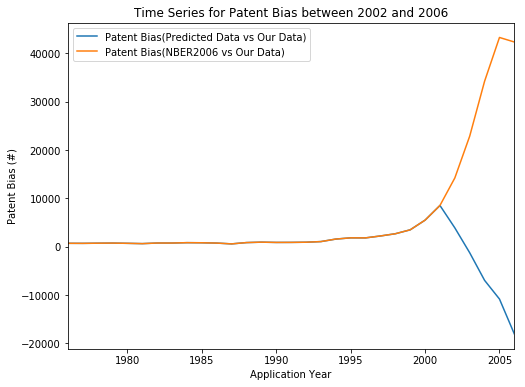

In [41]:
tPlots[["year","Patent Bias(Predicted Data vs Our Data)","Patent Bias(NBER2006 vs Our Data)"]].plot(x="year", figsize=[8,6])
plt.xlabel("Application Year")
plt.ylabel("Patent Bias (#)")
plt.title("Time Series for Patent Bias between 2002 and 2006")
savefig('Pred_Bias_Compare.png')

In [42]:
# Bias_Records = pd.read_stata("regressions/construct bias/final_patent_citation_data.dta")

In [43]:
# Save updated patent file to updated_patent_data.csv for citations prediction
old_outputs = FirmInfo_class_agg_full_save_for_update[FirmInfo_class_agg_full_save_for_update.filed_year<=2001][["gvkey","filed_year","cat_code","wku"]]
MLoutputs.columns = ["gvkey","filed_year","cat_code","wku"]
MLoutputs.loc[MLoutputs.wku<0,"wku"] = 0
Save_data = old_outputs.append(MLoutputs)
Save_data.to_csv("updated_patent_data.csv", index=False)